<a href="https://colab.research.google.com/github/ritika1000/Machine_learning_projects/blob/main/Gold_Price_Predictionipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dependencies



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

data collection and processing



In [2]:
gold_data = pd.read_csv("/content/gld_price_data.csv")

In [3]:
gold_data.head()


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_data.shape

(2290, 6)

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# prompt: describe

gold_data.describe()


,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation

In [9]:
# prompt: correlation

correlation = gold_data.corr()


<ipython-input-9-ed80364a43b6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


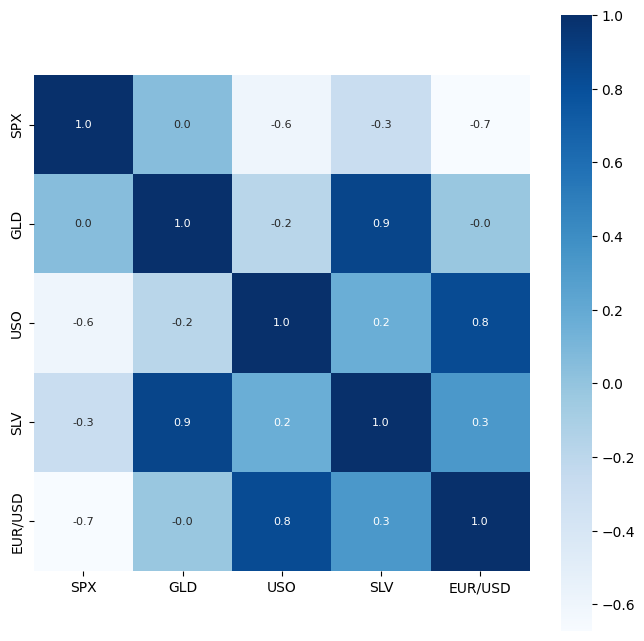

In [11]:
# prompt: plt

plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True,annot=True,cmap='Blues',square=True,fmt='.1f',annot_kws={'size':8})
plt.show()


In [12]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


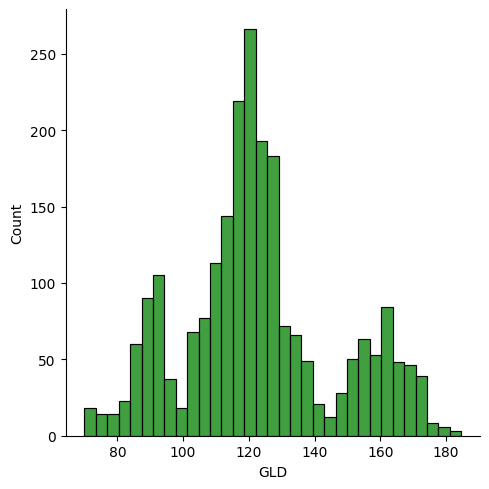

In [14]:
sns.displot(gold_data['GLD'],color='green')

splitting the features and target

In [15]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [18]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


SPLITTING TRAIN AND TEST DATA

In [19]:
#  TEST AND TRAIN

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


model training

In [20]:
# prompt: randomforest

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)


RandomForestRegressor()

Model evaluation

In [21]:
# predict

test_data_pred= model.predict(X_test)


In [22]:
print(test_data_pred)

[168.60759964  81.91269981 115.75659993 127.57900088 120.49660133
 154.64969798 150.45059765 126.24760039 117.48669877 126.02830077
 116.62500089 171.59970064 141.62859867 167.86479852 115.16040002
 117.8133005  137.94760408 170.46200099 159.7296032  160.11759968
 155.12079964 125.32630018 176.3344993  157.27790314 125.13540067
  93.62849976  77.70990033 120.46710004 119.1564993  167.47110013
  88.38020018 124.9764      91.03580068 117.68570019 121.12759946
 136.63310079 115.41060141 115.23150076 148.01069974 107.21490116
 104.86160269  87.10489784 126.47600077 118.08030002 152.82069937
 119.49420001 108.37299927 108.17519797  93.32290048 127.06699811
  75.26010017 113.66769914 121.47340036 111.33239935 118.77459885
 120.82759951 159.33190069 167.93120117 146.81379668  85.84349875
  94.24430028  86.77619839  90.48100012 119.03380048 126.42900075
 127.50149999 169.16499975 122.26319929 117.2827991   98.5491003
 168.32190103 142.63979787 132.05330245 121.2477021  121.38509959
 119.613300

In [24]:
#  r square

error_score=metrics.r2_score(y_test,test_data_pred)


In [25]:
print(error_score)

0.989272792379533


compare actual value and predicted value

In [26]:
y_test=list(y_test)

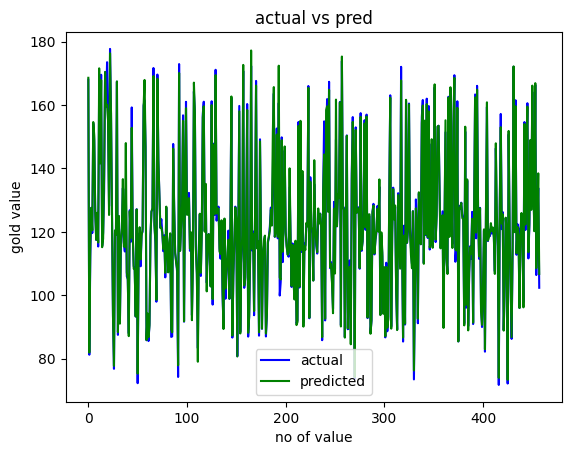

In [28]:
# prompt: plot actual vs predict value

plt.plot(y_test,color='blue',label='actual')
plt.plot(test_data_pred,color='green',label='predicted')
plt.title('actual vs pred')
plt.xlabel('no of value')
plt.ylabel('gold price')
plt.legend()
plt.show()

